# Installation

* Install Donker (https://docs.docker.com/get-docker/)
* Clone and pull this repo.
* Run the following in your local repo:
```docker run -d -p 8888:8888 -v $(pwd):/srv gw000/keras-full``` Password is 'keras' (Uses this container: https://hub.docker.com/r/gw000/keras-full/)

In your browser, go to http://localhost:8888/notebooks/train.ipynb

To use Tensorboard, go to http://localhost:8888/, check-select the 'logs' directory and click the 'Tensorboard' button.  This should start a tensorboard instance using an tensorboard events files located in the logs directory.
Check out the 'usage' section [here](https://github.com/lspvic/jupyter_tensorboard).


# Neural Network

Inspired by biological brains.

<img src="https://www.astroml.org/_images/fig_neural_network_1.png" />

# Activation Function

<img src="https://miro.medium.com/max/2000/1*4ZEDRpFuCIpUjNgjDdT2Lg.png" />

### Why do we need non-linear activation functions?

<img src="https://i.stack.imgur.com/JdfWD.png" />

# Convolutions

Again, takes inspiration from biological visual systems.

## The Problem

If we try to learn from the entire image at once, it's very hard difficult to generalize to similar images:
<img src="resources/why_cnn.png"/>

Break the problem up into smaller problems:
<img src="resources/features_cnn.png"/>

With Convolutions, we take advantage of the fact that in some problem domains (like vision), nearby pixels are more likely to be related than more distant pixels.  With a fully connected network, the model would have to learn this relationship, which would be very difficult because there is not "dimensionality" to the input.  Furthermore, it solves a scaling problem vs fully connected networks.

<img src="resources/convolution_math.png"/>
<img src="https://cdn-images-1.medium.com/max/1600/0*1PSMTM8Brk0hsJuF." />
<img src="https://mlnotebook.github.io/img/CNN/convSobel.gif" />
<img src="resources/convolved_result.png"/>

# Pooling

### It's a form of down-sampling


<img src="https://mlnotebook.github.io/img/CNN/poolfig.gif"/>
<img src="https://www.embedded-vision.com/sites/default/files/technical-articles/CadenceCNN/Figure7.jpg" />


# Hierarchies of Features

<img src="resources/example_cnn.png"/>
<img src="resources/hierarchy_of_features.png"/>


# Backpropagation/Gradient Descent

But how does it learn?

For each image (batch of images, typically), calculate how 'wrong' the network is (usually with a loss function) compared to the correct answer.  Using some calculus (we don't even have to know the calculus!) we calculate the gradient (i.e. direction) of the error for each weight in the entire network.  We then slighly adjust the weight so that the gradient is minimized.  

<img src="resources/gradient_descent.png"/>

For a more thorough description: [https://machinelearning.technicacuriosa.com/2017/03/05/introduction-to-convolutional-neural-networks/](https://machinelearning.technicacuriosa.com/2017/03/05/introduction-to-convolutional-neural-networks/)

## Classification 

When you want to classify things.

In [1]:
#
# Data Preparation -- The most boring but often the hardest part.
#

import os
from tensorflow import keras
import numpy as np

#load the training and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

print('max pixel value', np.max(x_train[0]))

# Scale images to the [0, 1] range
x_train = x_train / 255
x_test = x_test / 255

print('max pixel value', np.max(x_train[0]))

print(x_train.shape)
# Make sure images have shape (NUM_IMAGES, 28, 28, 1) -- This is kinda dumb, but necessary for Keras (and most other frameworks)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

#print the shape of the loaded data
print('train: ', x_train.shape, 'test:', x_test.shape)

max pixel value 255
max pixel value 1.0
(60000, 28, 28)
train:  (60000, 28, 28, 1) test: (10000, 28, 28, 1)


In [2]:
#one-hot encode the y-values
from keras.utils import np_utils

NUM_CLASSES = 10

# print before
print(y_train[0])
y_train = np_utils.to_categorical(y_train, NUM_CLASSES)
y_test = np_utils.to_categorical(y_test, NUM_CLASSES)
# print after
print(y_train[0])

5
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]


Using TensorFlow backend.


## Training Data - Visualization and Numpy Shape practice

(250, 28, 28, 1)
(10, 25, 28, 28)
(280, 700)


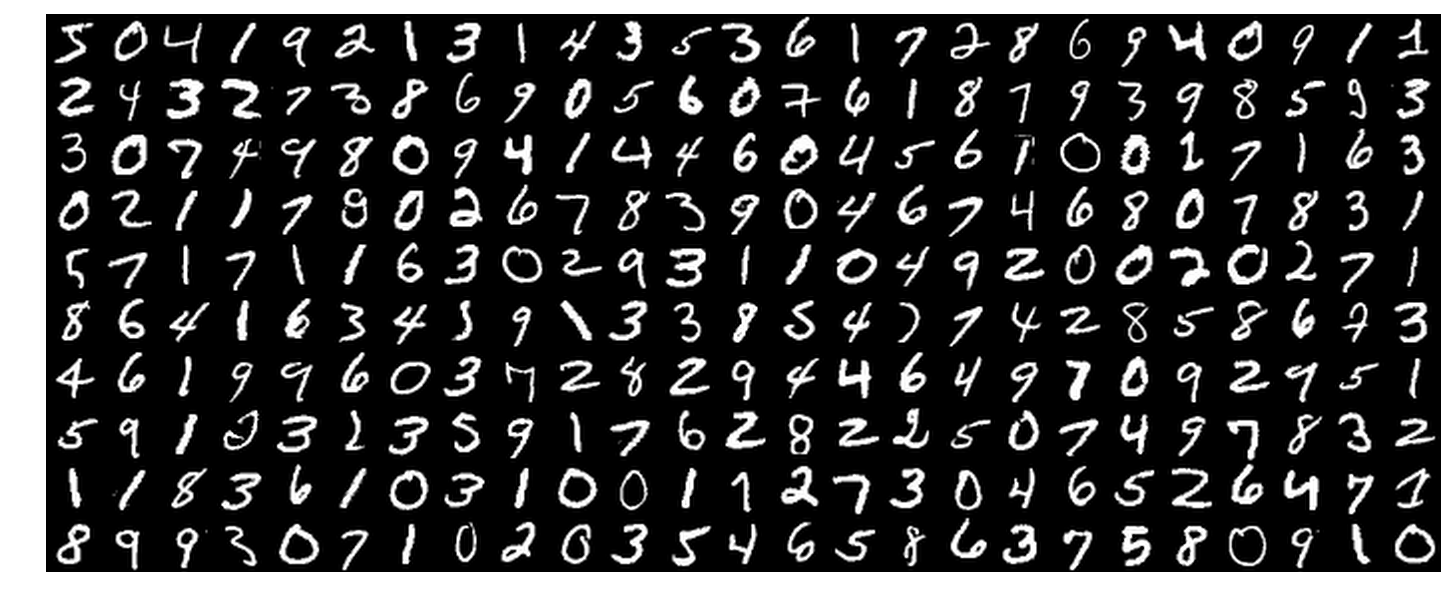

In [3]:
##
# Visualize a few of the training images -- Not a necessary cell ---
##

from matplotlib import pyplot
import numpy as np


NUM_IMAGES = 250
NUM_PER_COL = 25

#grab the first NUM_PER_COL training images & show them in a grid
x = x_train[:NUM_IMAGES]
input_shape = x[0].shape
%matplotlib inline
# if the number of images isn't evenly divisible by NUM_PER_COL
remainder = x.shape[0] % NUM_PER_COL
if remainder > 0:
    # make some filler zero-valued pixels to fill in the remaining empty columns in the last row
    filler = np.zeros((NUM_PER_COL-remainder, input_shape[0], input_shape[1]))
    
    # add the filler to the big image
    x = np.concatenate((x, filler), axis=0)

# NUM_IMAGES x each image width x each image height x 1 channel (it's a gray-scale image)
print(x.shape)  
x_plot = x.reshape((x.shape[0] // NUM_PER_COL, NUM_PER_COL, input_shape[0], input_shape[1]))
# Number of Rows (calculated) x NUM_PER_COL x each image width x each image height 
print(x_plot.shape)
x_plot = np.vstack([np.hstack(x) for x in x_plot])
# pixels accross x pixels down
print(x_plot.shape)
fig = pyplot.figure(figsize=(18, 16), dpi= 100,)   
pyplot.axis('off')
pyplot.imshow(x_plot, interpolation='lanczos', cmap='gray')

In [4]:
#lets go ahead and write these as images to disk in a directory
# Not a necessary step
#

def write_training_data_to_disk():
    from PIL import Image
    import os

    DATA = 'data/mnist'
    #make the directory structure

    if not os.path.exists('data'):
        os.mkdir('data')
        
    if not os.path.exists(DATA):
        os.mkdir(DATA)

        for i in range(0,10):
            class_dir = os.path.join(DATA, str(i))
            if not os.path.exists(class_dir):
                os.mkdir(class_dir)


        class_count = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0}
        print(x_train.shape[0])
        for i in range(x_train.shape[0]):
            cls = y_train[i]
            class_dir = os.path.join(DATA, str(cls))
            image = Image.fromarray(x_train[i])
            file_path = os.path.join(class_dir, str(cls) + '_' + str(class_count[cls]) + '.png')
            image.save(file_path)
            class_count[cls] += 1
            
        for i in range(x_test.shape[0]):
            cls = y_test[i]
            class_dir = os.path.join(DATA, str(cls))
            image = Image.fromarray(x_test[i])
            file_path = os.path.join(class_dir, str(cls) + '_' + str(class_count[cls]) + '.png')
            image.save(file_path)
            class_count[cls] += 1


    print('done')

#write_training_data_to_disk()

In [5]:
#
# Make the model
#

print('input shape', input_shape)
model = keras.Sequential(
    [
        keras.layers.InputLayer(input_shape=input_shape),
        keras.layers.Conv2D(32, kernel_size=(5, 5), activation="relu", padding="same", strides=(2,2)),
        #keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu", padding="same"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Dropout(0.5),        
        keras.layers.Flatten(),        
        keras.layers.Dense(NUM_CLASSES, activation='softmax', use_bias=False)
    ]
)

model.summary()

input shape (28, 28, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)             

In [6]:
# setup the tensorboard callback
import datetime
logdir = "logs/scalars/classification" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
callbacks = [tensorboard_callback]

In [7]:
##
# Train the model
##

import os

#model serialization boilerplate
model_dir = 'models/'
model_classification_path = os.path.join(model_dir, 'model_classification')
# create directory if it doesn't exist
if not os.path.exists(model_dir):
    os.mkdir(model_dir)

retrain = True
batch_size = 128
epochs = 15                                      

if retrain or not os.path.exists(model_classification_path):
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), callbacks=callbacks)
    model.save(model_classification_path)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================]60000/60000 [==============================] - 35s 586us/step - loss: 0.3112 - acc: 0.9056 - val_loss: 0.0759 - val_acc: 0.9788

Epoch 2/15
60000/60000 [==============================]60000/60000 [==============================] - 34s 562us/step - loss: 0.0933 - acc: 0.9712 - val_loss: 0.0559 - val_acc: 0.9827

Epoch 3/15
60000/60000 [==============================]60000/60000 [==============================] - 41s 678us/step - loss: 0.0722 - acc: 0.9772 - val_loss: 0.0420 - val_acc: 0.9870

Epoch 4/15
60000/60000 [==============================]60000/60000 [==============================] - 39s 652us/step - loss: 0.0593 - acc: 0.9815 - val_loss: 0.0335 - val_acc: 0.9883

Epoch 5/15
60000/60000 [==============================]60000/60000 [

## Data Analysis

9928/10000 0.9928


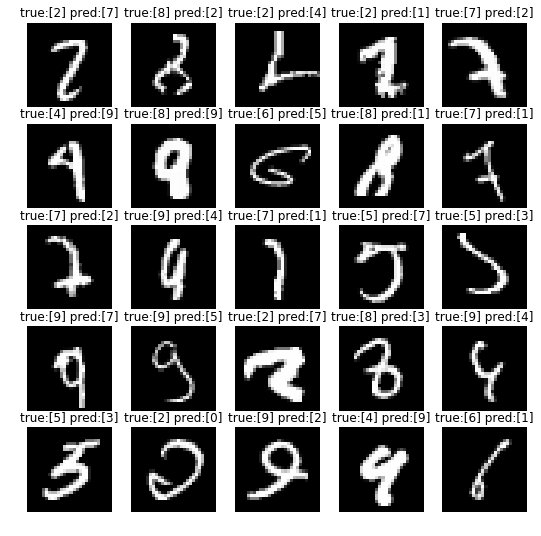

In [8]:
##
# Let's look at some of the images that the model predicts incorrectly
##
from tensorflow import keras

model = keras.models.load_model('models/model_classification')
y_prediction = model.predict(x_test)

#convert back from one-hot encoding to true class value (i.e. one of: 0,1,2,3,4,5,6,7,8,9)
y_prediction = np.argmax(y_prediction,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 

# find all the indices where the predicted value doesn't match the labelled value
bad_indices = np.argwhere(y_prediction != y_true)

print( str((len(y_true) - len(bad_indices))) + '/' + str(len(y_true)),  (len(y_true) - len(bad_indices)) / len(y_true))

# grab the first 25 indices and match them to images
bad_images = x_test[bad_indices[:25]] * 255
# reshape the numpy array of image data so matplotlib is happy
bad_images = bad_images.reshape(25, 28, 28)

%matplotlib inline

fig=pyplot.figure(figsize=(9, 9))
columns = 5
rows = 5
for i in range(1, columns*rows +1):    
    ax = fig.add_subplot(rows, columns, i)
    #fig.subplots_adjust(top=0.85)
    index = bad_indices[i-1]
    ax.set_title('true:' + str(y_true[index]) + ' pred:' + str(y_prediction[index]))
    pyplot.axis('off')
    pyplot.imshow(bad_images[i-1], cmap="gray")
pyplot.show()


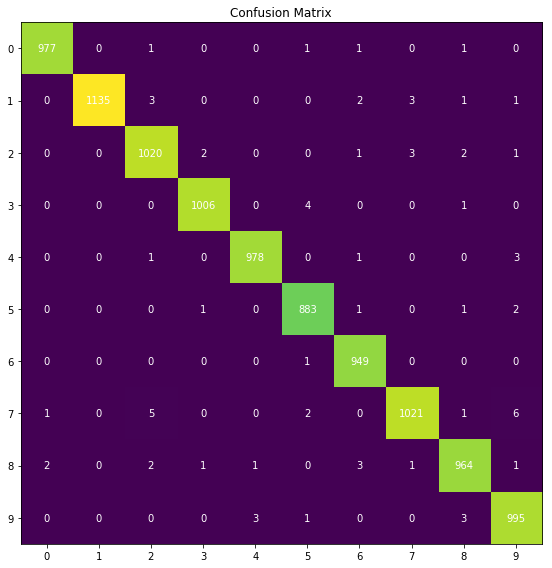

0 99.5922528033
1 99.1266375546
2 99.1253644315
3 99.5054401583
4 99.491353001
5 99.4369369369
6 99.8947368421
7 98.5521235521
8 98.8717948718
9 99.3013972056


In [9]:
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from matplotlib import pyplot
import numpy as np

model = keras.models.load_model('models/model_classification')

y_prediction = model.predict(x_test)

#convert back from one-hot encoding to true class value (i.e. one of: 0,1,2,3,4,5,6,7,8,9)
y_prediction = np.argmax(y_prediction,axis = 1) 
y_true = np.argmax(y_test,axis = 1) 

confusion = confusion_matrix(y_prediction, y_true) 

#print(confusion)
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(10,8))
im = ax.imshow(confusion)

# We want to show all ticks...
ax.set_xticks(np.arange(NUM_CLASSES))
ax.set_yticks(np.arange(NUM_CLASSES))
# ... and label them with the respective list entries
ax.set_xticklabels(range(0,NUM_CLASSES+1))
ax.set_yticklabels(range(0, NUM_CLASSES+1))

# Loop over confusion matrix and create text. 
# BTW, There's almost certainly a built-in way to iterate overy numpy arrays with indices
rowIdx = 0
for row in confusion:  
    colIdx = 0
    for col in row:
        text = ax.text(colIdx, rowIdx, col,
                       ha="center", va="center", color="w")
        colIdx += 1
    rowIdx += 1

ax.set_title("Confusion Matrix")
fig.tight_layout()

pyplot.show()

#per class accuracy
rowIdx = 0
for row in confusion:  
    print(rowIdx, row[rowIdx] / np.sum(row) * 100 )
    rowIdx += 1

## Binary Classification

When you want an either/or, yes/no, True/False prediction.


In [10]:
# Create binary classification model to give yes/no answer to whether or not digit is a '0'
from tensorflow import keras

model = keras.models.load_model(model_classification_path)

x = model.layers[-2].output
x = keras.layers.Dense(1, activation='sigmoid', use_bias=False)(model.layers[-2].output)
model = keras.Model(inputs=model.input, outputs=x, name="mnist_binary")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3136      
Total para

In [11]:
from tensorflow import keras
import numpy as np

#load the training and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

print('max pixel value', np.max(x_train[0]))

# Scale images to the [0, 1] range
x_train = x_train / 255
x_test = x_test / 255

print('max pixel value', np.max(x_train[0]))

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# function to vectorize
def is_zero(x):
  if x == 0:
    return 1.0
  else: return 0.0

# vectorize it
is_zero = np.vectorize(is_zero)

print(y_train[0], y_train[1])
y_train = is_zero(y_train)
y_test = is_zero(y_test)
print(y_train[0], y_train[1])

max pixel value 255
max pixel value 1.0
5 0
0.0 1.0


In [12]:
# setup the tensorboard callback
import datetime
logdir = "logs/scalars/binary_classification" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
callbacks = [tensorboard_callback]

In [13]:
# train the binary classification model
model_classification_path = os.path.join(model_dir, 'model_classification')
model_binary_classification_path = os.path.join(model_dir, 'model_binary_classification')
batch_size = 128
epochs = 3

if retrain or not os.path.exists(model_binary_classification_path):
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
              validation_data=(x_test,y_test), callbacks=callbacks)
    model.save(model_binary_classification_path)
    

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================]60000/60000 [==============================] - 41s 679us/step - loss: 0.0301 - acc: 0.9893 - val_loss: 0.0066 - val_acc: 0.9981

Epoch 2/3
60000/60000 [==============================]60000/60000 [==============================] - 37s 612us/step - loss: 0.0072 - acc: 0.9975 - val_loss: 0.0046 - val_acc: 0.9986

Epoch 3/3
60000/60000 [==============================]60000/60000 [==============================] - 42s 703us/step - loss: 0.0060 - acc: 0.9980 - val_loss: 0.0043 - val_acc: 0.9988



0 0.0
[[9015    7]
 [   5  973]]


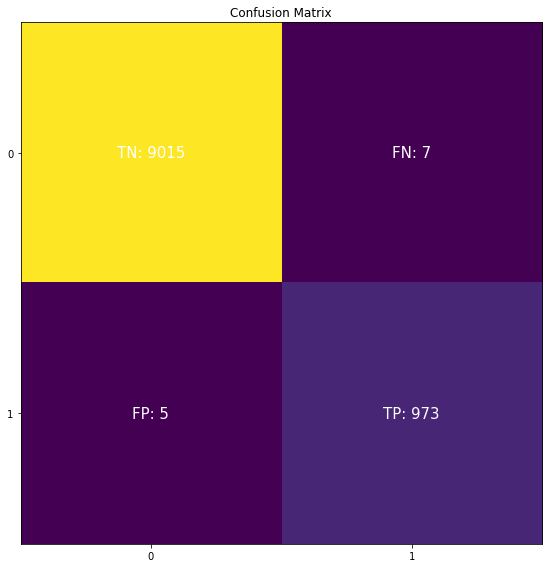

0 99.9224118821
1 99.4887525562


In [14]:
model = keras.models.load_model(model_binary_classification_path)

y_prediction = model.predict(x_test).flatten()

#convert prediction to 0 or 1
y_prediction = np.where(y_prediction >= 0.5, 1, 0)


y_prediction = y_prediction.flatten()
print(y_prediction[0], y_test[0])
confusion = confusion_matrix(y_prediction, y_test) 

print(confusion)
%matplotlib inline
fig, ax = pyplot.subplots(figsize=(10,8))
im = ax.imshow(confusion)

# We want to show all ticks...
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
# ... and label them with the respective list entries
ax.set_xticklabels(range(0,2))
ax.set_yticklabels(range(0,2))

# Loop over confusion matrix and create text. 
# BTW, There's almost certainly a built-in way to iterate overy numpy arrays with indices

text = [['TN', 'FN'], ['FP', 'TP']]
rowIdx = 0
for row in confusion:  
    colIdx = 0
    for col in row:
        ax.text(colIdx, rowIdx, text[rowIdx][colIdx] + ': ' + str(col),
                       ha="center", va="center", color="w", fontsize=15)
        colIdx += 1
    rowIdx += 1

ax.set_title("Confusion Matrix")
fig.tight_layout()

pyplot.show()

#per class accuracy
rowIdx = 0
for row in confusion:  
    print(rowIdx, row[rowIdx] / np.sum(row) * 100 )
    rowIdx += 1

## Regression

When you want a scalar-valued prediction.  For example, predict stock values or x,y coordinate values for bounding boxes of objects in an image.

In [15]:
# Prepare data for regression task

from tensorflow import keras
import numpy as np

#load the training and test data
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

print('max pixel value', np.max(x_train[0]))

# Scale images to the [0, 1] range
x_train = x_train / 255
x_test = x_test / 255

print('max pixel value', np.max(x_train[0]))

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(y_train[:10])

max pixel value 255
max pixel value 1.0
[5 0 4 1 9 2 1 3 1 4]


In [16]:
# Create regression model to give scalar value (not actually very useful -- just to illustrate regression)
from tensorflow import keras

model = keras.models.load_model(model_classification_path)

x = model.layers[-2].output
x = keras.layers.Dense(10, activation='relu')(x)
x = keras.layers.Dense(1, activation='linear')(x)
model = keras.Model(inputs=model.input, outputs=x, name="mnist_binary")
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                31370     
__________

In [17]:
# setup the tensorboard callback
import datetime
logdir = "logs/scalars/regression" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)
callbacks = [tensorboard_callback]

In [18]:
# train the regression model
model_regression_path = os.path.join(model_dir, 'model_regression')
batch_size = 128
epochs = 10

if retrain or not os.path.exists(model_regression_path):
    model.compile(loss="mse", optimizer="adam", metrics=["mean_absolute_error"])
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
              validation_data=(x_test,y_test), callbacks=callbacks)
    model.save(model_regression_path)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================]60000/60000 [==============================] - 40s 668us/step - loss: 2.2831 - mean_absolute_error: 1.0760 - val_loss: 1.0058 - val_mean_absolute_error: 0.6703

Epoch 2/10
60000/60000 [==============================]60000/60000 [==============================] - 37s 612us/step - loss: 1.2182 - mean_absolute_error: 0.7737 - val_loss: 0.8159 - val_mean_absolute_error: 0.5814

Epoch 3/10
60000/60000 [==============================]60000/60000 [==============================] - 42s 695us/step - loss: 1.0624 - mean_absolute_error: 0.7063 - val_loss: 0.7270 - val_mean_absolute_error: 0.5369

Epoch 4/10
60000/60000 [==============================]60000/60000 [==============================] - 42s 702us/step - loss: 0.9236 - mean_absolute_error: 0.6426 - val_loss: 0.6344 - val_mean_absolute_error: 0.4903

Epoch 5/10
60000/60000 [==============================]60000/60000 [==================

In [19]:
model = keras.models.load_model(model_regression_path)

y_prediction = model.predict(x_test).flatten()


indices_per_digit = np.array([np.argwhere(y_test == x).flatten() for x in range(0, 10)])
print(y_prediction[indices_per_digit[4]][:25])
stats = [(x, np.mean(y_prediction[indices_per_digit[x]]) - x, np.std(y_prediction[indices_per_digit[x]])) for x in range(0,10)]
print(stats)

[ 3.89265203  4.28746986  3.7036891   3.81678176  3.79261398  1.79937947
  3.74474359  3.93074536  3.75891018  4.05277157  3.6133399   4.21538496
  4.11024952  5.56918955  3.76758528  4.19047689  6.57119274  3.96286869
  4.44430494  3.93678284  4.29648113  3.62518096  4.05862045  4.26068068
  4.35625267]
[(0, 0.25363394618034363, 0.50514078), (1, 0.07978510856628418, 0.34620464), (2, 0.0076019763946533203, 0.43963784), (3, -0.043995380401611328, 0.39467704), (4, -0.045361518859863281, 0.6220454), (5, -0.17483186721801758, 0.52121896), (6, -0.36186027526855469, 0.62167817), (7, -0.50840139389038086, 0.75609922), (8, -0.70871925354003906, 0.89248121), (9, -0.65297317504882812, 0.98454845)]
